# Clustering: Ejemplo k-means


- Objetivo es agrupar las diferentes observaciones en el dataset, sin tener en cuenta la variable Y
- Útil para crear nuevas variables para futuros modelos

In [1]:
# Cargamos diferentes paquetes
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


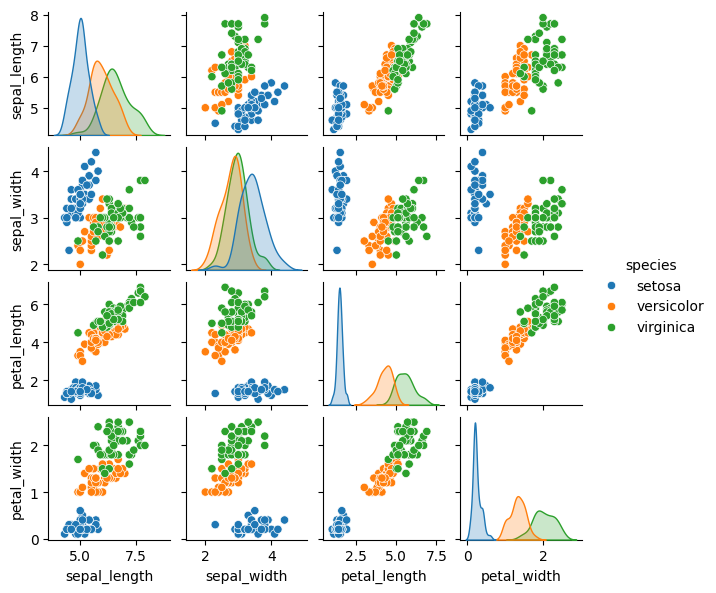

In [3]:
sns.pairplot(iris, hue='species', size=1.5);
#viendo esto puedes sacar un insight, reconocemos mejor la setosa porque esta mas separada del resto igual que le pasara al modelo

## Ajuste del clustering a los datos

In [4]:
# Data Preprocess
X = iris.drop('species', axis=1)
y = pd.DataFrame(iris['species'])
print(X.head())
print("---------------")
print(y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
---------------
  species
0  setosa
1  setosa
2  setosa
3  setosa
4  setosa


In [5]:
from sklearn.cluster import KMeans

# De la clase KMeans, crea el objeto clustering
clustering = KMeans(n_clusters=3, random_state= 5)
# Ajuste
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

In [6]:
# Output, asignación del cluster de cada variable
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [7]:
km_labels = pd.DataFrame(clustering.labels_)
km_labels.columns = ["KM"]
km_labels.head()

,KM
0,0
1,0
2,0
3,0
4,0


In [8]:
iris_km = pd.concat([iris, km_labels], axis=1)
print(iris_km.dtypes)
iris_km.head(100)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
KM                int32
dtype: object


,sepal_length,sepal_width,petal_length,petal_width,species,KM
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor,1
96,5.7,2.9,4.2,1.3,versicolor,1
97,6.2,2.9,4.3,1.3,versicolor,1
98,5.1,2.5,3.0,1.1,versicolor,1


In [9]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
iris_km['species_num'] = LE.fit_transform(iris_km['species'])

In [10]:
iris_km

,sepal_length,sepal_width,petal_length,petal_width,species,KM,species_num
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2,2
146,6.3,2.5,5.0,1.9,virginica,1,2
147,6.5,3.0,5.2,2.0,virginica,2,2
148,6.2,3.4,5.4,2.3,virginica,2,2


In [11]:
iris_km.describe()

,sepal_length,sepal_width,petal_length,petal_width,KM,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.920000,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.764304,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,1.750000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.000000


In [12]:
iris_km.head()

,sepal_length,sepal_width,petal_length,petal_width,species,KM,species_num
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [13]:
iris_km[['species',"KM"]][5:10]

,species,KM
5,setosa,0
6,setosa,0
7,setosa,0
8,setosa,0
9,setosa,0


In [14]:
iris_km[['species',"KM"]].value_counts()

species     KM
setosa      0     50
versicolor  1     48
virginica   2     36
            1     14
versicolor  2      2
Name: count, dtype: int64

Text(0.5, 1.0, 'K-means classification')

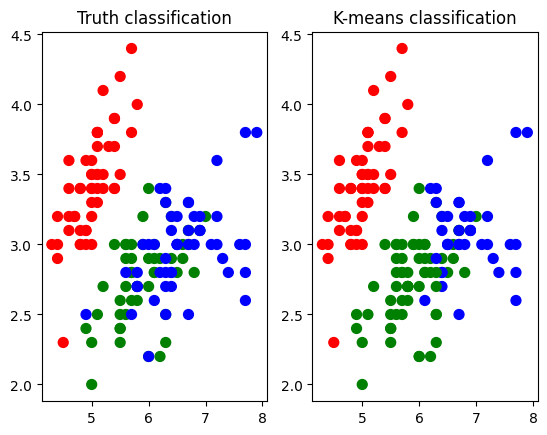

In [15]:
color_theme = np.array(['r','g','b'])
plt.subplot(1,2,1)

plt.scatter(x=iris_km['sepal_length'], y=iris_km['sepal_width'], c= color_theme[iris_km['species_num']], s=50)
plt.title('Truth classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_km['sepal_length'], y=iris_km['sepal_width'], c= color_theme[iris_km['KM']], s=50)
plt.title('K-means classification')


## Selección del número óptimo K?

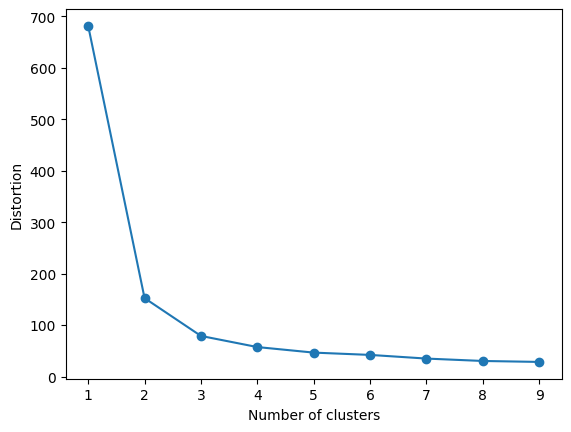

In [16]:
distortions = []
for i in range(1, 10):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

La inercia en el clustering es una medida que se utiliza para evaluar la calidad de un agrupamiento. Se define como la suma de las distancias cuadradas de cada punto a su centroide más cercano.

Mide la coherencia interna de los clusters.

Cuanto menor sea la inercia, más compactos y coherentes serán los clústeres.




# PCA

Iris Dataset

In [17]:
from sklearn.decomposition import PCA  # 1. Importamos la clase
model = PCA(n_components=4)            # 2. Elegimos los parámetos
model.fit(X)                           # 3. Ajustamos el dato
X_2D = model.transform(X)              # 4. Transformamos el dato

In [18]:
model.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [19]:
model.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [20]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Now let's plot the results. A quick way to do this is to insert the results into the original Iris ``DataFrame``, and use Seaborn's ``lmplot`` to show the results:

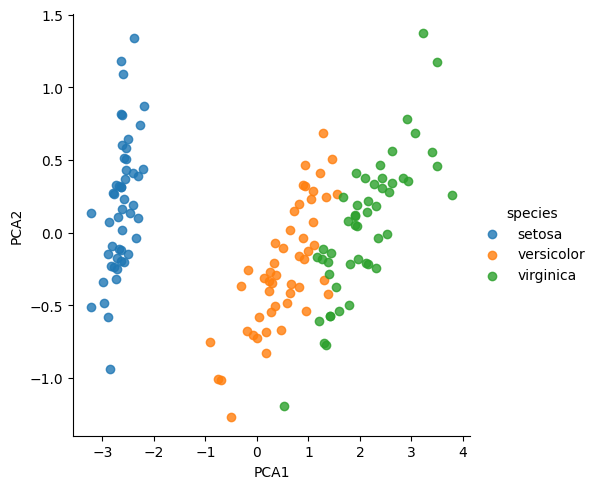

In [21]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);

In [22]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


In [23]:
# De la clase KMeans, crea el objeto clustering
clustering_2= KMeans(n_clusters=3, random_state= 5)
# Ajuste
clustering_2.fit(iris[['PCA1','PCA2']])

# Output, asignación del cluster de cada variable
clustering_2.labels_

iris['KM_PCA'] = pd.DataFrame(clustering_2.labels_)

print(iris_km[['species',"KM"]].value_counts())
print(iris[['species',"KM_PCA"]].value_counts())

iris.head()

species     KM
setosa      0     50
versicolor  1     48
virginica   2     36
            1     14
versicolor  2      2
Name: count, dtype: int64
species     KM_PCA
setosa      0         50
versicolor  2         47
virginica   1         36
            2         14
versicolor  1          3
Name: count, dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,KM_PCA
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,0
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,0
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0


In [24]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
iris['species_num'] = LE.fit_transform(iris['species'])

Text(0.5, 1.0, 'K-means classification')

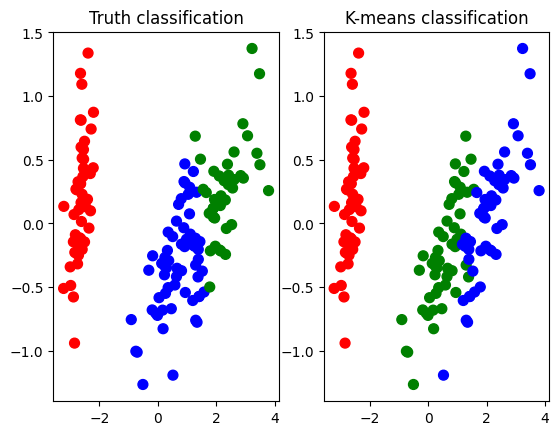

In [25]:
color_theme = np.array(['r','g','b'])
plt.subplot(1,2,1)

plt.scatter(x=iris['PCA1'], y=iris['PCA2'], c= color_theme[iris['KM_PCA']], s=50)
plt.title('Truth classification')

plt.subplot(1,2,2)

plt.scatter(x=iris['PCA1'], y=iris['PCA2'], c= color_theme[iris_km['species_num']], s=50)
plt.title('K-means classification')